<a href="https://colab.research.google.com/github/mikeyu4281/data-repo/blob/main/temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/mikeyu4281/data-repo/main/test_apa%20-%20test_apa.csv")

data.head()

,Date,Open,High,Low,Close,Volume
0,2024/01/26,32.070000,32.270000,31.629999,32.110001,4158400
1,2024/01/25,31.490000,32.049999,31.100000,32.040001,4761900
2,2024/01/24,31.110001,31.480000,30.799999,31.370001,5783500
3,2024/01/23,30.530001,31.100000,30.450001,30.850000,5541000
4,2024/01/22,30.370001,30.910000,30.090000,30.709999,5194700


In [16]:
data['Date'].value_counts()

2024/01/26    1
2022/11/30    1
2022/11/14    1
2022/11/15    1
2022/11/16    1
             ..
2023/07/03    1
2023/07/05    1
2023/07/06    1
2023/07/07    1
2022/04/28    1
Name: Date, Length: 439, dtype: int64

In [17]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<Axes: >

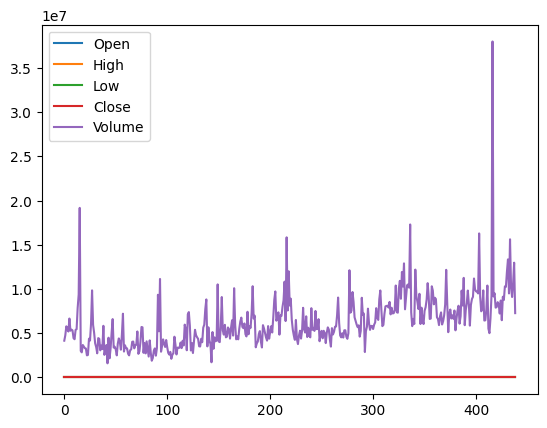

In [19]:
data.plot()



In [21]:
X_train, y_train = data[:60000], data[:60000]

In [22]:
X_val, y_val = data[60000:65000], data[60000:65000]

# Test data
X_test, y_test = data[65000:], data[65000:]

In [23]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [30]:
n_features = 1

model1 = Sequential()
n_input = 10
n_features = 1
model1.add(InputLayer((n_input,n_features)))

model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 8)                 408       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 151817 (593.04 KB)
Trainable params: 151817 (593.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model1.compile(loss = MeanSquaredError(),
               optimizer = Adam(learning_rate = 0.0001),
               metrics = RootMeanSquaredError())

print(X_train)
print("Y train ", y_train)


model1.fit(X_train, y_train,
           validation_data = (X_val, y_val),
           epochs = 50,
           callbacks = [early_stop])

           Date       Open       High        Low      Close    Volume
0    2024/01/26  32.070000  32.270000  31.629999  32.110001   4158400
1    2024/01/25  31.490000  32.049999  31.100000  32.040001   4761900
2    2024/01/24  31.110001  31.480000  30.799999  31.370001   5783500
3    2024/01/23  30.530001  31.100000  30.450001  30.850000   5541000
4    2024/01/22  30.370001  30.910000  30.090000  30.709999   5194700
..          ...        ...        ...        ...        ...       ...
434  2022/05/04  42.164943  43.401706  40.467991  43.334595  10228600
435  2022/05/03  38.962788  41.187041  38.905267  40.765202   9096200
436  2022/05/02  38.646407  39.403800  37.563041  38.934025  10677800
437  2022/04/29  39.825644  40.870660  38.991546  39.240818  12974500
438  2022/04/28  38.809388  40.247483  37.313768  39.739357   7272700

[439 rows x 6 columns]
Y train             Date       Open       High        Low      Close    Volume
0    2024/01/26  32.070000  32.270000  31.629999  32.1100

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).